In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%matplotlib inline
from IPython import display
from PIL import Image, ImageFont, ImageDraw
from math import cos, sin, pi, sqrt, atan
from matplotlib.pyplot import imshow
from pathlib import Path
import imageio
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import requests
import sys

ccw_history_radius_dict = load_object('ccw_history_radius_dict')
ccw_history_theta_dict = load_object('ccw_history_theta_dict')
ccw_history_year_dict = load_object('ccw_history_year_dict')
cw_history_radius_dict = load_object('cw_history_radius_dict')
cw_history_theta_dict = load_object('cw_history_theta_dict')
cw_history_year_dict = load_object('cw_history_year_dict')
dresses_file_dict = load_object('dresses_file_dict')
dresses_list = load_object('dresses_list')
first_date_dict = load_object('first_date_dict')
generations_df = load_object('generations_df')
patriline_df = load_object('patriline_df')
saeculum_cmap_dict = load_object('saeculum_cmap_dict')
second_date_dict = load_object('second_date_dict')
turnings_df = load_object('turnings_df')

MAX_HEIGHT = 936
MAX_WIDTH = 936
dresses_regex = re.compile(r'(\d{4})-(\d{4})\.png')
jpg_dir = os.path.join(SAVES_FOLDER, 'jpg')
min_year = patriline_df['year_of_birth'].min()
movie_folder = os.path.join(SAVES_FOLDER, 'movies')
bare_movie_folder = os.path.join(movie_folder, 'bare')
png_folder = os.path.join(SAVES_FOLDER, 'png')
saeculum_dir = os.path.join(DATA_FOLDER, 'saeculum')
saeculum_movie_folder = os.path.join(movie_folder, 'saeculum')
saeculum_fashionable_movie_folder = os.path.join(movie_folder, 'saeculum_fashionable')

white_tuple = (255, 255, 255, 0)
black_tuple = (0, 0, 0, 255)
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 Image	 ImageDraw	 ImageFont	 MAX_HEIGHT	 MAX_WIDTH	 Path	 
SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 atan	 attempt_to_pickle	 bare_movie_folder	 black_tuple	 ccw_history_radius_dict	 ccw_history_theta_dict	 
ccw_history_year_dict	 cos	 csv	 cw_history_radius_dict	 cw_history_theta_dict	 cw_history_year_dict	 display	 dresses_file_dict	 dresses_list	 
dresses_regex	 example_iterrows	 first_date_dict	 generations_df	 get_column_descriptions	 imageio	 imshow	 jpg_dir	 load_csv	 
load_dataframes	 load_object	 logging	 math	 min_year	 movie_folder	 np	 os	 patriline_df	 
pd	 pi	 pickle	 plt	 png_folder	 re	 requests	 saeculum_cmap_dict	 saeculum_dir	 
saeculum_fashionable_movie_folder	 saeculum_movie_folder	 save_dataframes	 second_date_dict	 sin	 sqrt	 store_objects	 sys	 turnings_df	 
white_tuple	 


In [2]:

patriline_df.sample(5).T

patriarch_name,"(No Name), Sr.","Elkanah Babbitt, III","(No Name), Jr.","Elkanah Babbitt, I",David Babbitt
year_of_birth,1518,1710,1550,1665,1766
year_of_death,1585,1816,1624,1735,1816
generation_name,Reprisal,Awakening,Elizabethan,Glorious,Republican
date_of_birth,estimated between 1485 and 1545,1710,1550,"December 15, 1665",1766
place_of_birth,Unknown Place of Birth,"Berkley, Bristol County, Province of Massachus...",Unknown Place of Birth,"Taunton, Bristol County, Massachusetts, United...","Lanesborough, Berkshire, MA, United States"
birth_longitude,NaN,41.826,NaN,41.9164,42.537
birth_latitude,NaN,-71.0988,NaN,-71.1544,-73.2739
date_of_death,Unknown Date of Death,1816 (106),"April 01, 1624 (74)","December 22, 1735 (70)","September 08, 1816 (50)"
place_of_death,Unknown Place of Death,"Cooperstown, Otsego, N.Y.",Unknown Place of Death,"Berkley, Bristol County, Province of Massachus...","Lanesborough, Berkshire, MA"
death_longitude,NaN,42.7002,NaN,41.826,42.537


In [121]:

generations_df.index.tolist()

['Arthurian', 'Humanist', 'Reformation', 'Reprisal', 'Elizabethan', 'Parliamentary', 'Puritan', 'Cavalier', 'Glorious', 'Enlightenment', 'Awakening', 'Liberty', 'Republican', 'Compromise', 'Transcendental', 'Gilded', 'Civil War', 'Progressive', 'Missionary', 'Lost', 'G.I.', 'Silent', 'Baby Boom', '13th', 'Millennial', 'Homeland']

In [3]:

generations_df.sample(5).T

generation_name,Lost,Parliamentary,13th,Awakening,Civil War
childhood_turning_entered,2,4,2,1,3
saeculum_name,Great Power,Reformation,Millennial,Revolutionary,Civil War
turnings_archetype,Nomad,Artist,Nomad,Prophet,Hero
generations_archetype,Reactive,Adaptive,Reactive,Idealist,Civic
birth_year_begin,1883,1566,1961,1701,1822
birth_year_end,1900,1587,1981,1723,1842
childhood_turning_description,"Missionary Awakening, Progressive era",Armada Crisis,"Consciousness Revolution, Fourth Great Awakening",Augustan Age of Empire,"Mexican War and Sectionalism, Gold Rush, Wild ..."
turning_year_begin,1886,1569,1963,1704,1844
turning_year_end,1908,1594,1983,1727,1860


In [4]:

turnings_df.sample(5).T

turning_name,The Augustan Age of Empire,Reconstruction & Gilded Age,Merrie England,The Global Financial Crisis,The colonial Glorious Revolution
turning_number,1,1,1,4,4
turning_begin_year,1704,1865,1594,2008,1675
turning_end_year,1727,1886,1621,2029,1704
saeculum_name,Revolutionary,Great Power,New World,Millennial,New World
entering_elderhood,Cavaliers,Transcendentals,Reprisal,Boomers,Puritans
entering_midlife,Glorious,Gilded,Elizabethans,Xers,Cavaliers
entering_young_adulthood,Enlighteners,Progressives,Parliamentarians,Millennials,Glorious
entering_childhood,Awakeners,Missionaries,Puritans,Homelanders,Enlighteners
turning_notes,"The Augustan Age of Empire (First Turning, 170...","Reconstruction & Gilded Age (First Turning, 18...","Merrie England (First Turning, 1594–1621) was ...","The Global Financial Crisis (Fourth Turning, 2...",The colonial Glorious Revolution (Fourth Turni...


In [123]:

def show_generation_blurb(generation_name):
    if str(generation_name) != 'nan':
        print('{}'.format(generation_name))
        match_series = (generations_df.index == generation_name[:-1])
        turnings_archetype_list = generations_df[match_series]['turnings_archetype'].tolist()
        if not len(turnings_archetype_list):
            match_series = (generations_df.index == generation_name)
            turnings_archetype_list = generations_df[match_series]['turnings_archetype'].tolist()
        if len(turnings_archetype_list):
            turnings_archetype = turnings_archetype_list[0].lower()
            print('({})'.format(turnings_archetype))
        generations_archetype_list = generations_df[match_series]['generations_archetype'].tolist()
        if len(generations_archetype_list):
            generations_archetype = generations_archetype_list[0].lower()
            print('{}'.format(generations_archetype))

for turning_name, row_series in turnings_df.iterrows():
    turning_begin_year = row_series['turning_begin_year']
    turning_end_year = row_series['turning_end_year']
    turning_notes = row_series['turning_notes']
    entering_elderhood = row_series['entering_elderhood']
    entering_midlife = row_series['entering_midlife']
    entering_young_adulthood = row_series['entering_young_adulthood']
    entering_childhood = row_series['entering_childhood']
    print()
    print('{}-{}'.format(turning_begin_year, turning_end_year))
    print('{}'.format('\n'.join(turning_notes.split('. '))))
    print('-------------------------')
    show_generation_blurb(entering_elderhood)
    print('-------------------------')
    show_generation_blurb(entering_midlife)
    print('-------------------------')
    show_generation_blurb(entering_young_adulthood)
    print('-------------------------')
    show_generation_blurb(entering_childhood)
    print('-------------------------')


1435-1459
Retreat from France (Third Turning, 1435–1459) was an era of dynastic decline and civil disorder
In 1435, not long after Joan of Arc's execution, the English withdrew from Paris for the last time
In the 1440s, they were pushed out of France on all fronts
Thus ended the Hundred Years War
Meanwhile, the weak rule of young Henry VI eroded central authority in England
By the 1450s, noble houses flouted the law, vied for power, and engaged in private wars with impunity.
-------------------------
-------------------------
-------------------------
-------------------------
Arthurians
(hero)
civic
-------------------------

1459-1487
The War of the Roses (Fourth Turning, 1459–1487) began with an irrevocable break between the ruling Houses of Lancaster and York
After a bloody civil war, Yorkist kings (Edward IV, Edward V, Richard III) mostly prevailed in reigns that were punctuated with invasions and rebellions
At Bosworth Field (in 1485), Henry Tudor defeated Richard III and crowne

In [127]:

match_series = (generations_df['turning_year_end'] <= 1860)
df = generations_df[match_series].copy()
match_series = (df['turning_year_end'] == df['turning_year_end'].max())
df[match_series].T

generation_name,Civil War
childhood_turning_entered,3
saeculum_name,Civil War
turnings_archetype,Hero
generations_archetype,Civic
birth_year_begin,1822
birth_year_end,1842
childhood_turning_description,"Mexican War and Sectionalism, Gold Rush, Wild ..."
turning_year_begin,1844
turning_year_end,1860


In [124]:

match_series = (turnings_df['turning_end_year'] <= 1860)
df = turnings_df[match_series].copy()
match_series = (df['turning_end_year'] == df['turning_end_year'].max())
df[match_series].T

turning_name,The Mexican War & Sectionalism
turning_number,3
turning_begin_year,1844
turning_end_year,1860
saeculum_name,Civil War
entering_elderhood,Compromisers
entering_midlife,Transcendentals
entering_young_adulthood,Gilded
entering_childhood,Progressives
turning_notes,"The Mexican War & Sectionalism (Third Turning,..."


In [45]:

tables_url = 'https://www.lifecourse.com/about/method/generational-archetypes.html'
def get_page_tables(tables_url):
    tables_df_list = pd.read_html(tables_url)
    print(sorted([(i, df.shape) for (i, df) in enumerate(tables_df_list)], key=lambda x: x[1][0], reverse=True))
    
    return tables_df_list
tables_df_list = get_page_tables(tables_url)

[(2, (16, 2)), (0, (14, 5)), (3, (6, 2)), (1, (5, 6)), (4, (4, 2))]


In [38]:

eras_df = tables_df_list[1].copy()
eras_df.columns = [x[1] for x in eras_df.columns]
eras_df.set_index(keys=['Unnamed: 0_level_1'], inplace=True)
eras_df.index.name = 'eras'
store_objects(eras_df=eras_df)
eras_df

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\eras_df.pickle


,1908–1929(Unraveling),1929–1946 (Crisis),1946–1964 (High),1964–1984(Awakening),1984–2008(Unraveling)
eras,,,,,
Key Events,Four Freedoms World War I Prohibition Scopes T...,Crash of 1929 New Deal Pearl Harbor D-Day,McCarthyism Levittown Affluent Society Little ...,Kent State Woodstock Watergate Tax Revolt,Perestroika National Debt Culture Wars Simpson...
Entering Elderhood (Age 63–83),Progressive (Artist) empathic,Missionary (Prophet) wise,Lost (Nomad) tough,G.I. (Hero) hubristic,Silent (Artist) empathic
Entering Midlife (Ages 42–62),Missionary (Prophet) moralistic,Lost (Nomad) pragmatic,G.I. (Hero) powerful,Silent (Artist) indecisive,Boom (Prophet) moralistic
Entering Young Adulthood (Ages 21–41),Lost (Nomad) alienated,G.I. (Hero) heroic,Silent (Artist) sensitive,Boom (Prophet) narcissistic,Gen X (Nomad) alienated
Entering Childhood (Ages 0–20),G.I. (Hero) protected,Silent (Artist) suffocated,Boom (Prophet) indulged,Gen X (Nomad) abandoned,Millennial (Hero) protected


In [36]:

archetypes_df = tables_df_list[0].copy()
archetypes_df.columns = [x[1] for x in archetypes_df.columns]
archetypes_df.set_index(keys=['Unnamed: 0_level_1'], inplace=True)
archetypes_df.index.name = 'archetypes'
store_objects(archetypes_df=archetypes_df)
archetypes_df


Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\archetypes_df.pickle


,Hero,Artist,Prophet,Nomad
archetypes,,,,
Generations,Arthurian Elizabethan Glorious Republican — G....,Humanist Parliamentary Enlightenment Compromis...,Reformation Puritan Awakening Transcendental M...,Reprisal Cavalier Liberty Gilded LostGeneration X
Reputation As Child,good,placid,spirited,bad
Coming of Age,empowering,unfulfilling,sanctifying,alienating
Primary Focus Coming of Age,outer-world,inter-dependency,inner-world,self-sufficiency
Young Adulthood,building,improving,reflecting,competing
Transition in Midlife,energetic to hubristic,conformist to experimental,detached to judgmental,frenetic to exhausted
Leadership Style Entering Elderhood,"collegial,expansive","pluralistic,indecisive","righteous,austere","solitary,pragmatic"
Reputation as Elder,powerful,sensitive,wise,tough
Treatment as Elder,rewarded,liked,respected,abandoned


In [46]:

tables_url = 'https://www.lifecourse.com/about/method/the-four-turnings.html'
tables_df_list = get_page_tables(tables_url)

[(1, (17, 5)), (2, (16, 2)), (0, (7, 6)), (3, (6, 2)), (4, (4, 2))]


In [117]:

saecula_df = tables_df_list[0].copy()
saecula_df.set_index(keys=['Saeculum'], inplace=True)
saecula_df.columns = ['years_from_crisis_to_awakening', '(climax year) Awakening (Full Era)', 'years_from_awakening_to_crisis',
                      '(climax year) Crisis (Full Era)', 'years_from_crisis_to_crisis']
def f(x):
    x = re.sub('\D+', '', str(x))
    try:
        x = int(x)
    except:
        x = pd.np.nan
    
    return x
columns_list = [cn for cn in saecula_df.columns[0::2]]
for column_name in columns_list:
    saecula_df[column_name] = saecula_df[column_name].map(f)
def g(row_series):
    for prefix in ['Awakening', 'Crisis']:
        column_name = '(climax year) {} (Full Era)'.format(prefix)
        name_column = '{}_name'.format(prefix.lower())
        climax_year_column = '{}_climax_year'.format(prefix.lower())
        try:
            row_series[name_column] = row_series[column_name].split(')')[1].split('(')[0]
        except:
            row_series[name_column] = pd.np.nan
        years_list = [yr for yr in re.split(r'\D+', row_series[column_name], 0) if len(yr)]
        if len(years_list) == 3:
            row_series[climax_year_column], row_series['{}_begin_year'.format(prefix.lower())], row_series['{}_end_year'.format(prefix.lower())] = years_list
        elif len(years_list) == 1:
            row_series[climax_year_column] = years_list[0]
    
    return row_series
columns_list = ['awakening_name', 'awakening_climax_year', 'awakening_begin_year', 'awakening_end_year', 'crisis_name', 'crisis_climax_year',
                'crisis_begin_year', 'crisis_end_year'] + columns_list
for column_name in columns_list[:-3]:
    saecula_df[column_name] = pd.np.nan
saecula_df = saecula_df.apply(g, axis=1)[columns_list]
store_objects(saecula_df=saecula_df)
saecula_df.sample(5).T

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\saecula_df.pickle


Saeculum,Late Medieval,Reformation,New World,Great Power,Millennial
awakening_name,NaN,Protestant Reformation,Puritan Awakening,Third Great Awakening,Consciousness Revolution
awakening_climax_year,NaN,1536,1640,1896,1974
awakening_begin_year,NaN,1517,1621,1886,1964
awakening_end_year,NaN,1542,1649,1908,1984
crisis_name,Wars of the Roses,Armada Crisis,Glorious Revolution,Great Depression and World War II,Global Financial Crisis
crisis_climax_year,1485,1588,1588,1944,2025
crisis_begin_year,1459,1569,1675,NaN,2008
crisis_end_year,1487,1594,1704,NaN,2029
years_from_crisis_to_awakening,NaN,51,52,33,30
years_from_awakening_to_crisis,NaN,52,49,48,51


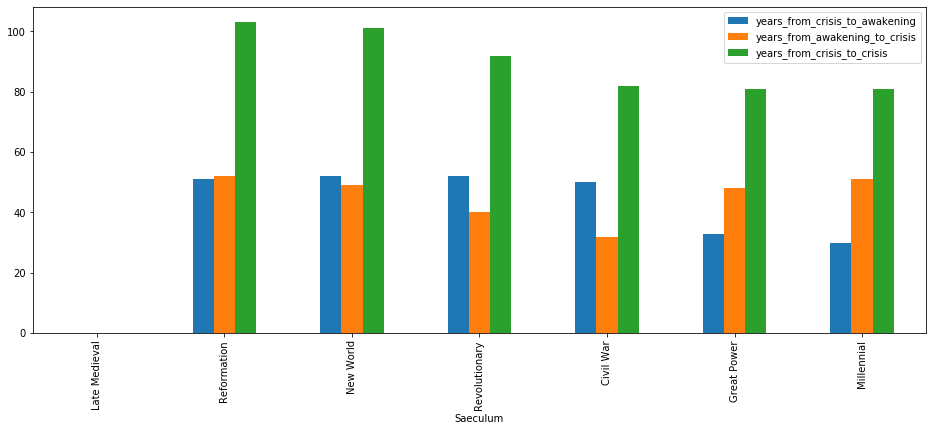

In [110]:

AxesSubplot_obj = saecula_df.plot.bar()
fig = AxesSubplot_obj.get_figure()
fig.set_size_inches(w=16, h=6)
#print([fn for fn in dir(fig) if ('size' in fn)])

In [67]:

turning_numbers_df = tables_df_list[1].copy()
turning_numbers_df.set_index(keys=['Generation Entering…'], inplace=True)
turning_numbers_df.columns = [1, 2, 3, 4]
#print([fn for fn in dir(turning_numbers_df) if 'append' in fn])
turning_numbers_df = turning_numbers_df.append(pd.DataFrame([{1: 'High', 2: 'Awakening',
                                                              3: 'Unraveling', 4: 'Crisis'}],
                                                            index=['turning_type']))
turning_numbers_df = turning_numbers_df.T
turning_numbers_df.columns = [re.sub(' ', '_', cn.lower()) for cn in turning_numbers_df.columns]
store_objects(turning_numbers_df=turning_numbers_df)
turning_numbers_df.T

Pickling to C:\Users\dev\Documents\repositories\notebooks\Strauss–Howe\saves\pickle\turning_numbers_df.pickle


,1,2,3,4
elderhoood,Nomad,Hero,Artist,Prophet
midlife,Hero,Artist,Prophet,Nomad
young_adulthood,Artist,Prophet,Nomad,Hero
childhood,Prophet,Nomad,Hero,Artist
families,Strong,Weakening,Weak,Strengthening
child_nurture,Loosening,Underprotective,Tightening,Overprotective
gap_between_gender_roles,Maximum,Narrowing,Minimum,Widening
ideals,Settled,Discovered,Debated,Championed
institutions,Reinforced,Attacked,Eroded,Founded
culture,Innocent,Passionate,Cynical,Practical


In [ ]:

turnings_df['turning_end_year'].unique()

In [ ]:

columns_list = ['turning_begin_year', 'turning_end_year']
turnings_df[columns_list].apply(lambda row_series: int((row_series['turning_begin_year']+row_series['turning_end_year'])/2), axis=1)

In [ ]:

def show_year_image(year):
    file_name = '{}.jpg'.format(year)
    file_path = os.path.join(jpg_dir, file_name)
    jpg_image = Image.open(fp=file_path, mode='r')
    jpg_image = jpg_image.rotate(angle=180)
    width, height = jpg_image.size
    if (width > MAX_WIDTH) or (height > MAX_HEIGHT):
        if (width > MAX_WIDTH):
            multiple = MAX_WIDTH / width
            width *= multiple
            height *= multiple
        if (height > MAX_HEIGHT):
            multiple = MAX_HEIGHT / height
            width *= multiple
            height *= multiple
        jpg_image = jpg_image.resize(size=(int(width), int(height)), resample=0, box=None)
        '''
        width, height = jpg_image.size
    left = 0 - int(width/2)
    right = int(width/2)
    top = 0 - int(height/2)
    bottom = int(height/2)
    AxesImage_obj = imshow(X=np.asarray(jpg_image), origin='upper', extent=(left, right, bottom, top))'''
    
    return jpg_image

In [ ]:

def polar_to_cartesian(r, theta):
    radians = theta*(pi/180)
    
    return int(r*cos(radians)), int(r*sin(radians))

In [ ]:

def create_xy_list(history_radius_dict):
    xy_list = []
    for radius in sorted(history_radius_dict.keys()):
        year, theta = history_radius_dict[radius]
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [ ]:

def get_one_stopped_arc(history_year_dict, start_year, stop_year, stopped_year, i=0):
    xy_list = []
    i = i % 4
    if stop_year > stopped_year:
        stop_year = stopped_year
    start_radius = history_year_dict[start_year][0]
    start_radius += 25*i
    stop_radius = history_year_dict[stop_year][0]
    stop_radius += 25*i
    increment_count = int(2*pi*start_radius)
    radius_array = np.linspace(start=start_radius, stop=stop_radius,
                               num=increment_count)
    start_theta = history_year_dict[start_year][1]
    stop_theta = history_year_dict[stop_year][1]
    theta_array = np.linspace(start=start_theta, stop=stop_theta,
                              num=increment_count)
    for radius, theta in zip(radius_array, theta_array):
        cartesian_tuple = polar_to_cartesian(radius, theta)
        if len(xy_list):
            if (cartesian_tuple != xy_list[-1]):
                xy_list.append(cartesian_tuple)
        else:
            xy_list.append(cartesian_tuple)
    
    return xy_list

In [ ]:

def show_turning_image(year):
    match_series = (turnings_df['turning_begin_year'] <= year) & (turnings_df['turning_end_year'] >= year)
    turning_name_list = turnings_df[match_series].index.tolist()
    if len(turning_name_list):
        turning_name = turning_name_list[0]
        file_name = '{}.jpg'.format(turning_name)
        file_path = os.path.join(jpg_dir, file_name)
        jpg_image = Image.open(fp=file_path, mode='r')
        jpg_image = jpg_image.rotate(angle=180)
        width, height = jpg_image.size
        if (width > MAX_WIDTH) or (height > MAX_HEIGHT):
            if (width > MAX_WIDTH):
                multiple = MAX_WIDTH / width
                width *= multiple
                height *= multiple
            if (height > MAX_HEIGHT):
                multiple = MAX_HEIGHT / height
                width *= multiple
                height *= multiple
            jpg_image = jpg_image.resize(size=(int(width), int(height)), resample=0, box=None)
        '''
        width, height = jpg_image.size
    left = 0 - int(width/2)
    right = int(width/2)
    top = 0 - int(height/2)
    bottom = int(height/2)
    AxesImage_obj = imshow(X=np.asarray(jpg_image), origin='upper', extent=(left, right, bottom, top))'''
    
    return jpg_image

In [ ]:

def show_saeculum_image(saeculum_name):
    file_name = '{}.jpg'.format(saeculum_name)
    file_path = os.path.join(jpg_dir, file_name)
    jpg_image = Image.open(fp=file_path, mode='r')
    jpg_image = jpg_image.rotate(angle=180)
    width, height = jpg_image.size
    if (width > MAX_WIDTH) or (height > MAX_HEIGHT):
        if (width > MAX_WIDTH):
            multiple = MAX_WIDTH / width
            width *= multiple
            height *= multiple
        if (height > MAX_HEIGHT):
            multiple = MAX_HEIGHT / height
            width *= multiple
            height *= multiple
        jpg_image = jpg_image.resize(size=(int(width), int(height)), resample=0, box=None)
        '''
        width, height = jpg_image.size
    left = 0 - int(width/2)
    right = int(width/2)
    top = 0 - int(height/2)
    bottom = int(height/2)
    AxesImage_obj = imshow(X=np.asarray(jpg_image), origin='upper', extent=(left, right, bottom, top))'''
    
    return jpg_image

In [ ]:

def add_fashion_image(year):
    
    # Get old image data
    old_path = os.path.join(png_folder, 'plot_{}.png'.format(year))
    foreground = Image.open(old_path)
    foreground = foreground.convert('RGBA')
    old_data_list = foreground.getdata()
    
    # Get new image data
    new_data_list = []
    for old_tuple in old_data_list:
        if (old_tuple[0] == 255) and (old_tuple[1] == 255) and (old_tuple[2] == 255):
            new_data_list.append(white_tuple)
        else:
            new_data_list.append(old_tuple)
    
    # Replace old with new
    foreground.putdata(new_data_list)
    
    # Get dresses image
    dresses_file = dresses_file_dict[year]
    if dresses_file is None:
        file_path = os.path.join(png_folder, 'plot_{}_fashionable.png'.format(year))
        foreground.save(file_path, 'PNG')
    else:
        file_path = os.path.join(png_folder, dresses_file)
        dresses_img = Image.open(file_path)
        dresses_img = dresses_img.convert('RGBA')

        dresses_img.paste(foreground, (0, 0), foreground)

        file_path = os.path.join(png_folder, 'plot_{}_fashionable.png'.format(year))
        dresses_img.save(file_path, 'PNG')

In [ ]:

def add_saeculum_image(year):
    
    # Get old image data
    old_path = os.path.join(bare_movie_folder, 'plot_{}.png'.format(year))
    foreground = Image.open(old_path)
    foreground = foreground.convert('RGBA')
    old_data_list = foreground.getdata()
    
    # Get new image data
    new_data_list = []
    for old_tuple in old_data_list:
        if (old_tuple[0] == 255) and (old_tuple[1] == 255) and (old_tuple[2] == 255):
            new_data_list.append(white_tuple)
        else:
            new_data_list.append(old_tuple)
    
    # Replace old with new
    foreground.putdata(new_data_list)
    
    # Get saeculum image
    match_series = (turnings_df['turning_begin_year'] <= year) & (turnings_df['turning_end_year'] >= year)
    saeculum_list = turnings_df[match_series].index.tolist()
    if len(saeculum_list):
        saeculum_name = saeculum_list[0]
        saeculum_file = '{}.png'.format(saeculum_name)
        saeculum_path = Path(os.path.join(saeculum_dir, saeculum_file))
        new_path = os.path.join(saeculum_movie_folder, 'plot_{}_saeculum.png'.format(year))
        if saeculum_path.is_file():
            saeculum_img = Image.open(saeculum_path, mode='r')
            saeculum_img = saeculum_img.convert('RGBA')
            saeculum_img.paste(foreground, (0, 0), foreground)
            saeculum_img.save(new_path, 'PNG')
        else:
            foreground.save(new_path, 'PNG')

In [ ]:

def get_row_label(present_year, patriarch_name, row_series):
    patriarch_age = present_year - int(row_series['year_of_birth'])
    year_of_death = row_series['year_of_death']
    generation_name = row_series['generation_name']
    try:
        year_of_death = int(year_of_death)
    except:
        year_of_death = present_year + 1
    age_str = ''
    if (year_of_death > present_year):
        if patriarch_age > 80:
            age_str = ' in Late Elderhood'
        elif patriarch_age > 60:
            age_str = ' in Elderhood'
        elif patriarch_age > 40:
            age_str = ' in Midlife'
        elif patriarch_age > 20:
            age_str = ' as a Young Adult'
        else:
            age_str = ' in Childhood'
    label_str = '{} ({} Generation{})'.format(patriarch_name, generation_name, age_str)
    
    return label_str

In [ ]:

def show_stopped_babbitt_plot(history_year_dict, history_theta_dict, stopped_year):

    # Turn interactive plotting off
    plt.ioff()
    
    # Create a new figure, plot into it, then close it so it never gets displayed
    fig = plt.figure(figsize=(13, 13))
    ax = fig.add_subplot(111, autoscale_on=False)
    ax.set_xlim(-1000, 1000)
    ax.set_ylim(-1000, 1000)
    match_series = (patriline_df['year_of_birth'] <= stopped_year)
    i = patriline_df[match_series].shape[0]-1
    d = 5
    previous_saeculum = patriline_df[match_series].head(1)['saeculum_name'].tolist()[0]
    for patriarch_name, row_series in patriline_df[match_series].iterrows():
        start_year = int(row_series['year_of_birth'])
        stop_year = row_series['year_of_death']
        try:
            stop_year = int(stop_year)
        except:
            stop_year = start_year + 80
            if stop_year > max(history_year_dict.keys()):
                stop_year = max(history_year_dict.keys())
        xy_list = get_one_stopped_arc(history_year_dict, start_year, stop_year, stopped_year, i)
        years_list = [year for year in [start_year, stop_year] if year <= stopped_year]
        add_spiral_labels(years_list, history_year_dict, i)
        if stop_year > stopped_year:
            stop_year = stopped_year
        text_color = row_series['xkcd_text_color']
        label_arc(start_year, stop_year, history_year_dict, history_theta_dict, patriarch_name, 13, i, text_color)
        saeculum = row_series['saeculum_name']
        if saeculum != previous_saeculum:
            previous_saeculum = saeculum
            d = 5
        #print(patriarch_name, i, d, saeculum)
        cmap = saeculum_cmap_dict[saeculum]
        #c = plt.get_cmap(cmap)(np.linspace(0, 1, 6))[d]
        c = row_series['xkcd_color']
        label_str = get_row_label(stopped_year, patriarch_name, row_series)
        PathCollection_obj = plt.plot([xy[0] for xy in xy_list], [xy[1] for xy in xy_list],
                                      alpha=0.75, label=label_str, c=c, linewidth=9)
        i -= 1
        d -= 1
    
    #show_turning_image(stopped_year)
    legend_obj = ax.legend(ncol=2, loc='upper left')
    frame_obj = legend_obj.get_frame()
    frame_obj.set_facecolor('whitesmoke')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Close it so it never gets displayed
    file_name = 'plot_{}.png'.format(stopped_year)
    file_path = os.path.join(bare_movie_folder, file_name)
    plt.savefig(file_path, format='png')
    plt.close(fig)

In [ ]:

def add_spiral_labels(years_list, history_year_dict, i=0):
    i = i % 4
    for year in years_list:
        radius, theta = history_year_dict[year]
        radius += 25*i
        radius -= 25/2
        x, y = polar_to_cartesian(radius, theta)
        text_obj = plt.text(x, y, year, fontsize=10, color='gray',
                            rotation=theta-90, rotation_mode='anchor')

In [ ]:

def label_arc(start_year, stopped_year, history_year_dict, history_theta_dict,
              arc_label, ideal_distance=13, i=0, label_color='black'):
    i = i % 4
    starting_year = int(((start_year + stopped_year) / 2) - (len(arc_label) / 2))
    starting_radius, starting_theta = history_year_dict[starting_year]
    next_radius, next_theta = history_year_dict[starting_year+1]
    

    # Tan(A) = Opposite/Adjacent
    radians = atan(ideal_distance/starting_radius)
    theta_sign = np.sign(next_theta-starting_theta)
    
    # Increment the theta so that it spaces the letters the same regardless of the radius
    theta_increment = theta_sign*(radians*180/pi)
    
    # Figure out if you have to flip the characters upside-down and place them backwards
    if (starting_theta%360) < 200:
        #logging.info('')
        #logging.info('Right-side up thetas:')
        theta = starting_theta
        radius = starting_radius + 25*i
        radius -= 25/2
        for c in arc_label[::int(-theta_sign)]:
            #logging.info('c: "{}", radius: "{}", theta: "{}"'.format(c, radius, theta % 360))
            x, y = polar_to_cartesian(radius, theta)
            text_obj = plt.text(x, y, c, fontsize=12, color=label_color,
                                rotation=theta-90, rotation_mode='anchor')
            theta += theta_increment
            if int(theta) in history_theta_dict:
                radius = history_theta_dict[int(theta)][1]
                radius += 25*i
                radius -= 25/2
    else:
        logging.info('')
        logging.info('Upside-down thetas:')
        theta = starting_theta + theta_increment*len(arc_label)
        if int(theta) in history_theta_dict:
            radius = history_theta_dict[int(theta)][1]
            radius += 25*i
        else:
            radius = starting_radius + 25*i
        radius += 25/2
        for c in arc_label[::int(-theta_sign)]:
            logging.info('c: "{}", radius: "{}", theta: "{}"'.format(c, radius, theta % 360))
            x, y = polar_to_cartesian(radius, theta)
            text_obj = plt.text(x, y, c, fontsize=12, color=label_color,
                                rotation=theta+90, rotation_mode='anchor')
            theta -= theta_increment
            if int(theta) in history_theta_dict:
                radius = history_theta_dict[int(theta)][1]
                radius += 25*i
                radius += 25/2

In [ ]:

def distance_from_white(old_tuple):
    x_diff = 255 - old_tuple[0]
    y_diff = 255 - old_tuple[1]
    z_diff = 255 - old_tuple[2]
    
    return sqrt(x_diff**2 + y_diff**2 + z_diff**2)

In [ ]:

def distance_from_black(old_tuple):
    
    return sqrt(old_tuple[0]**2 + old_tuple[1]**2 + old_tuple[2]**2)

In [ ]:

def make_transparent(img, threshold=38):
    margin = 255/distance_from_white(black_tuple)
    old_data_list = img.getdata()
    
    # Get new image data
    new_data_list = []
    for old_tuple in old_data_list:
        transparency = int(margin * distance_from_white(old_tuple))
        if transparency > threshold:
            transparency = 255
        elif transparency < 0:
            transparency = 0
        old_tuple = (old_tuple[0], old_tuple[1], old_tuple[2], transparency)
        new_data_list.append(old_tuple)
    
    # Replace old with new
    img.putdata(new_data_list)
    
    return img

In [ ]:

def add_fashion_saeculum_image(year):
    
    # Get old image data
    old_path = os.path.join(bare_movie_folder, 'plot_{}.png'.format(year))
    foreground = Image.open(old_path)
    foreground = foreground.convert('RGBA')
    foreground = make_transparent(foreground, threshold=6)
    
    # Get dresses image
    dresses_file = dresses_file_dict[year]
    if dresses_file is None:
        dresses_img = foreground
    else:
        file_path = os.path.join(png_folder, dresses_file)
        dresses_img = Image.open(file_path)
        dresses_img = dresses_img.convert('RGBA')
        dresses_img = make_transparent(dresses_img, threshold=5)
        dresses_img.paste(foreground, (0, 0), foreground)
    
    # Get saeculum image
    match_series = (turnings_df['turning_begin_year'] <= year) & (turnings_df['turning_end_year'] >= year)
    saeculum_list = turnings_df[match_series].index.tolist()
    if len(saeculum_list):
        saeculum_name = saeculum_list[0]
        saeculum_file = '{}.png'.format(saeculum_name)
        saeculum_path = Path(os.path.join(saeculum_dir, saeculum_file))
        if saeculum_path.is_file():
            saeculum_img = Image.open(saeculum_path, mode='r')
            saeculum_img = saeculum_img.convert('RGBA')
            saeculum_img.paste(dresses_img, (0, 0), dresses_img)
        else:
            saeculum_img = dresses_img
        file_path = os.path.join(saeculum_fashionable_movie_folder, 'plot_{}_saeculum_fashionable.png'.format(year))
        saeculum_img.save(file_path, 'PNG')

In [ ]:

def make_a_movie(stop_year=2020, png_suffix='', movie_folder=bare_movie_folder, movie_name=None):
    images_list = []
    for stopped_year in range(min_year, stop_year):
        png_name = 'plot_{}{}.png'.format(stopped_year, png_suffix)
        png_path = os.path.join(movie_folder, png_name)
        images_list.append(imageio.imread(png_path))
    png_name = 'plot_{}{}.png'.format(stop_year, png_suffix)
    png_path = os.path.join(movie_folder, png_name)
    for i in range(200):
        images_list.append(imageio.imread(png_path))
    if movie_name is None:
        movie_name = '_'.join(png_suffix.split('_')[1:] + ['movie']) + '.gif'
    gif_path = os.path.join(movie_folder, movie_name)
    imageio.mimsave(gif_path, images_list)

In [ ]:

def exists(path):
    r = requests.head(path)
    
    return r.status_code == requests.codes.ok

In [ ]:

show_stopped_babbitt_plot(cw_history_year_dict, cw_history_theta_dict, 2020)

In [ ]:

for stopped_year in range(min_year, 2031):
    show_stopped_babbitt_plot(cw_history_year_dict, cw_history_theta_dict, stopped_year)

In [ ]:

add_fashion_saeculum_image(1971)

In [ ]:

for stopped_year in range(min_year, 2031):
    add_fashion_saeculum_image(stopped_year)

In [ ]:

make_a_movie(2020, png_suffix='_saeculum_fashionable', movie_folder=saeculum_fashionable_movie_folder, movie_name='movie_to_2020.gif')

In [ ]:

make_a_movie(1989, png_suffix='_saeculum_fashionable', movie_folder=saeculum_fashionable_movie_folder, movie_name='stephen_movie.gif')

In [ ]:

from importlib import reload

reload(logging)
logging.basicConfig(filename='../logs/label_arc.log', filemode='a',
                    format='%(asctime)s,%(msecs)d %(name)s %(levelname)s %(message)s',
                    datefmt='%H:%M:%S', level=logging.INFO)
logging.info('Running Label Arc')

In [ ]:

logging.getLogger().setLevel(logging.INFO)

In [ ]:

for i in range(1971, 1980):
    dresses_file_dict[i] = '1971-1979.png'
store_objects(dresses_file_dict=dresses_file_dict)

In [ ]:

min_decade = 10 * (min_year//10)
for i in range(min_decade, 2020, 10):
    url = 'https://en.wikipedia.org/wiki/{}s_in_fashion'.format(i)
    if exists(url):
        print('{} exists'.format(i))

In [ ]:

print(os.path.abspath(os.path.join(saeculum_movie_folder, 'plot_{}_saeculum.png'.format(2020))))

In [ ]:

# Pillow
print('{} -m pip install --upgrade Pillow'.format(sys.executable))
!{sys.executable} -m pip install --upgrade Pillow

In [ ]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body;
var attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

In [ ]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))